In [42]:
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng') # Added this line for POS tagger

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [43]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


In [44]:
# List the files to see what we have
!ls -la

!pip install kaggle

# Load the dataset
import pandas as pd
import os

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Check what files are available
print("Available files:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"  - {file}")

# Load the main dataset
df = pd.read_csv('education_inequality_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
if 'school_type' in df.columns:
    print(f"School Types: {df['school_type'].unique()}")
elif 'state' in df.columns:
    print(f"States: {df['state'].unique()}")
else:
    print("Could not identify a clear category column. Please inspect df.columns for categories.")

total 280
drwxr-xr-x 1 root root  4096 Aug  3 21:12  .
drwxr-xr-x 1 root root  4096 Aug  3 20:29  ..
drwxr-xr-x 4 root root  4096 Jul 29 13:36  .config
-rw-r--r-- 1 root root 89340 Aug  3 21:06 'education_inequality_data (1).csv'
-rw-r--r-- 1 root root 89340 Aug  3 21:12 'education_inequality_data (2).csv'
-rw-r--r-- 1 root root 89340 Aug  3 20:31  education_inequality_data.csv
drwxr-xr-x 1 root root  4096 Jul 29 13:36  sample_data


Saving education_inequality_data.csv to education_inequality_data (3).csv
User uploaded file "education_inequality_data (3).csv" with length 89340 bytes
Available files:
  - education_inequality_data.csv
  - education_inequality_data (1).csv
  - education_inequality_data (3).csv
  - education_inequality_data (2).csv
Dataset shape: (1000, 12)
Columns: ['id', 'school_name', 'state', 'school_type', 'grade_level', 'funding_per_student_usd', 'avg_test_score_percent', 'student_teacher_ratio', 'percent_low_income', 'percent_minority', 'internet_access_percent', 'dropout_rate_percent']
School Types: ['Private' 'Charter' 'Public']


📊 OVERVIEW OF DATA
Total entries: 1000
Unique School Types: 3
School Types: ['Private', 'Charter', 'Public']

📈 SCHOOL TYPE DISTRIBUTION
school_type
Private    355
Charter    326
Public     319
Name: count, dtype: int64


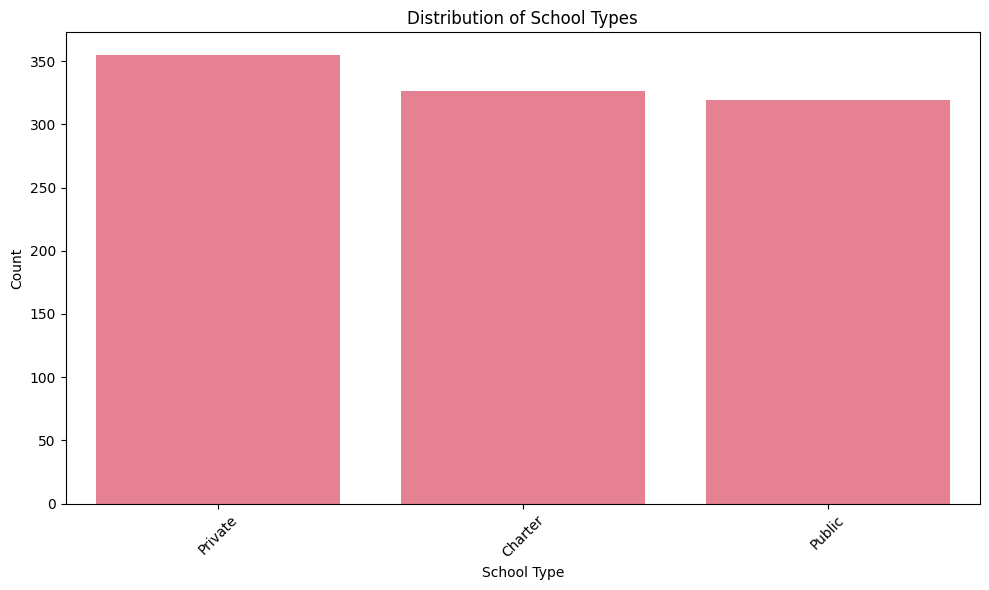


🔍 MISSING VALUES
id                         0
school_name                0
state                      0
school_type                0
grade_level                0
funding_per_student_usd    0
avg_test_score_percent     0
student_teacher_ratio      0
percent_low_income         0
percent_minority           0
internet_access_percent    0
dropout_rate_percent       0
dtype: int64

📝 ROW COUNT
Total rows: 1000

🔍 DATA QUALITY
Duplicate entries: 0


In [45]:
# Basic dataset exploration
print("📊 OVERVIEW OF DATA")
print("=" * 50)
print(f"Total entries: {len(df)}")

# Assuming 'school_type' is the category column
if 'school_type' in df.columns:
    print(f"Unique School Types: {df['school_type'].nunique()}")
    print(f"School Types: {df['school_type'].unique().tolist()}")
    print("\n📈 SCHOOL TYPE DISTRIBUTION")
    print("=" * 50)
    category_counts = df['school_type'].value_counts()
    print(category_counts)

    # Visualize columns distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='school_type', order=category_counts.index)
    plt.title('Distribution of School Types')
    plt.xlabel('School Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Could not identify a clear category column for distribution analysis.")

#Check for missing value
print("\n🔍 MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())

#Text Length Distribution
print("\n📝 ROW COUNT")
print("=" * 50)
print(f"Total rows: {len(df)}")


#Data quality
print("\n🔍 DATA QUALITY")
print("=" * 50)
print(f"Duplicate entries: {df.duplicated().sum()}")

In [46]:
# Google Generative AI library
!pip install google-generativeai

#The library
import google.generativeai as genai
from google.colab import userdata

# API key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY) #saved key in my collab

print("✅ Google Gemini API configured successfully!")

✅ Google Gemini API configured successfully!


In [47]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

query = ("give an overview of the dataset for education_inequality.csv")
response = model.generate_content(query)
print(response.text)

The `education_inequality.csv` dataset likely contains data related to educational inequality.  Without seeing the actual dataset, I can only provide a hypothetical overview based on the name.  A real overview would require inspecting the file itself.

A typical `education_inequality.csv` dataset might include variables such as:

* **Geographic identifiers:**  Country, state/province, district, school ID, etc.  This allows for analysis at different geographic scales.
* **Demographic variables:**  Information on student populations, potentially broken down by gender, race/ethnicity, socioeconomic status (SES), language spoken at home, etc. This is crucial for understanding inequality.
* **Educational attainment variables:**  Measures of educational outcomes like test scores (reading, math, science), graduation rates, college enrollment rates, years of schooling completed, etc. These are key indicators of inequality.
* **Resource variables:**  Information on school resources, such as per

In [48]:
def answer_question_with_gemini_citations(query: str, dataframe: pd.DataFrame):


    dataframe_string = dataframe.to_markdown(index=False)


    prompt = f"""
    You are an AI assistant that answers questions based on the following data.
    The data contains information about different schools, including their type,
    funding, test scores, and demographics.

    Data:
    {dataframe_string}

    Question:
    {query}

    Please see sources for more information.
    """

    try:


        model = genai.GenerativeModel('gemini-1.5-flash-latest')


        response = model.generate_content(prompt)

        # this is for the response string
        response_text_with_citations = response.text

        if hasattr(response, 'citations') and response.citations:
            response_text_with_citations += "\n\nSources:"

            for citation in response.citations:

                if hasattr(citation, 'school_type'):
                     response_text_with_citations += f"\n- {citation.source}"

                elif hasattr(citation, 'start_index') and hasattr(citation, 'end_index'):
                     response_text_with_citations += f"\n- Data excerpt from index {citation.start_index} to {citation.end_index}"
                else:
                    response_text_with_citations += f"\n- Unknown source format: {citation}"

        return response_text_with_citations


    except Exception as e:

        return f"An error occurred: {e}"

In [49]:
public_schools = df[df["school_type"] == "Public"]
average_funding = public_schools["funding_per_student_usd"].mean()
print(f"Average public-school funding per student: ${average_funding:,.2f}")

Average public-school funding per student: $15,535.39


In [50]:
from typing import List, Dict, Tuple

def answer_question_with_memory(query: str, dataframe: pd.DataFrame, history: List[Dict[str, str]], max_history_tokens: int = 1000) -> Tuple[str, List[Dict[str, str]]]:
    """
    Answers a question using the Gemini model with conversational history and data context.

    Args:
        query: The user's question.
        datafra
        me: The pandas DataFrame to provide as context.
        history: The list of previous conversation turns.
        max_history_tokens: The maximum number of tokens for the conversational history.

    Returns:
        A tuple containing the model's response text (with citations if available)
        and the updated conversation history.
    """
    # Append the new user question to the history
    history.append({"role": "user", "content": query})

    # Build the prompt including history and data context
    prompt = build_promt_with_history(history, dataframe, max_history_tokens)

    try:
        # Initialize the model
        model = genai.GenerativeModel('gemini-1.5-flash-latest')

        # Generate content from the model
        response = model.generate_content(prompt)

        # Extract the response text
        response_text = response.text

        # Add citations if available
        if hasattr(response, 'citations') and response.citations:
            response_text += "\n\nSources:"
            for citation in response.citations:
                # Assuming citations might have a source attribute or index range
                if hasattr(citation, 'source'):
                     response_text += f"\n- Source: {citation.source}"
                elif hasattr(citation, 'start_index') and hasattr(citation, 'end_index'):
                     response_text += f"\n- Data excerpt from index {citation.start_index} to {citation.end_index}"
                else:
                    response_text += f"\n- Unknown source format: {citation}"

        # Append the model's response to the history
        history.append({"role": "assistant", "content": response_text})

        return response_text, history

    except Exception as e:
        error_message = f"An error occurred: {e}"
        # Append the error as an assistant message to history
        history.append({"role": "assistant", "content": error_message})
        return error_message, history

In [51]:
from typing import List, Dict, Tuple
def build_promt_with_history(history: List[Dict[str, str]], dataframe: pd.DataFrame, max_history_tokens: int = 1000) -> str:

  convo_text = ""
  for turn in history:
          prefix = "User:" if turn["role"] == "user" else "Assistant:"
  convo_text += f"{prefix} {turn['content']}\n"

  retrieval_text = build_dataframe_context(df)

  full_prompt = f"{convo_text}\n{retrieval_text}\nAssistant:"

  return trim_to_token_limit(full_prompt, max_history_tokens)

In [52]:
import tiktoken

def build_dataframe_context(dataframe: pd.DataFrame) -> str:
    """
    Converts the dataframe to a string format for the prompt.
    """

    return dataframe.to_markdown(index=False)

def trim_to_token_limit(text: str, max_tokens: int, model_name: str = 'gpt-3.5-turbo') -> str:
    """
    Trims the text to fit within the specified token limit.
    """
    encoding = tiktoken.encoding_for_model(model_name)
    tokens = encoding.encode(text)
    if len(tokens) > max_tokens:

        trimmed_tokens = tokens[-max_tokens:]
        return encoding.decode(trimmed_tokens)
    return text

In [53]:
#testing it out
history = [] # Initialize history as an empty list
while True:


# Get user input
  query = input("You: ")

# Check if the user wants to exit
  if query.lower() in ("quit", "exit"):
    break

  # The function will update the history internally
  answer = answer_question_with_gemini_citations(query, df)
  print(answer)
  response_text, history = answer_question_with_memory(query, df, history)

  # Print the model's response
  print(f"Assistant: {response_text}")

  #history

print("\n--- Current History ---")
for turn in history:
  print(f"{turn['role'].capitalize()}: {turn['content']}")
  print("---------------------\n")

print("Conversation ended.")

You: what state bas the most private schools?
The provided data does not allow for a definitive answer to which state has the most private schools.  The data only shows a sample of schools, and doesn't indicate the total number of private schools in each state.

Assistant: This data appears to be a subset of a larger dataset on schools.  Each row represents a school, and the columns likely represent various metrics.  To better understand the data, let's label the columns:

| Column # | Column Name          | Description                                      | Data Type |
|---------|----------------------|--------------------------------------------------|------------|
| 1       | School ID            | Unique identifier for each school                 | Integer    |
| 2       | School Name           | Name of the school                               | String     |
| 3       | State                | State where the school is located                 | String     |
| 4       | School Type 

In [54]:
import google.generativeai as genai
import pandas as pd
from google.colab import userdata


try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GOOGLE_API_KEY)
    print("✅ Google Gemini API configured successfully!")
except Exception as e:
    print(f"❌ Failed to configure Google Gemini API: {e}")


def answer_with_reasoning(query: str, dataframe: pd.DataFrame) -> str:
    """
    Answers a question using the Gemini model and attempts to show reasoning steps.

    Args:
        query: The user's question.
        dataframe: The pandas DataFrame to provide as context.

    Returns:
        The model's response text, including reasoning steps if the prompt is effective.
    """
    dataframe_string = dataframe.to_markdown(index=False)

    #prompt to encourage step-by-step reasoning
    prompt = f"""
    You are an AI assistant that answers questions based on the following data.
    The data contains information about different schools.

    Data:
    {dataframe_string}

    Question:
    {query}

    Please break down your thinking process and show the steps you take to arrive at the answer.
    First, outline the steps. Then, execute the steps using the provided data. Finally, provide the final answer.

    Reasoning Steps:
    """

    try:
        model = genai.GenerativeModel('gemini-1.5-flash-latest')
        response = model.generate_content(prompt)

        return response.text

    except Exception as e:
        return f"An error occurred: {e}"


# df is already loaded from the previous steps
if 'df' in locals():
    print("\nTesting the model with reasoning prompt:")
    my_question = "What is the average funding per student for schools in California?"
    answer = answer_with_reasoning(my_question, df)
    print(answer)
else:
    print("\nDataFrame 'df' not found. Please ensure the data loading steps were completed.")

✅ Google Gemini API configured successfully!

Testing the model with reasoning prompt:
Reasoning Steps:

1. **Filter the data:** Identify all rows where the `state` column is equal to 'California'.
2. **Extract funding:** From the filtered rows, extract the values in the `funding_per_student_usd` column.
3. **Calculate the average:** Compute the average of the extracted funding values.


Execution:

1. **Filter:** The following rows correspond to California schools:

   | id  | school_name            | state       | school_type | grade_level | funding_per_student_usd |
   |-----|------------------------|--------------|--------------|--------------|--------------------------|
   | 13  | Smith High School       | California  | Public        | High          |                  22343.1 |
   | 42  | Harrington Middle School | California  | Public        | Elementary    |                   8089.92 |
   | 82  | Mendoza High School     | California  | Public        | Middle        |            